<a href="https://colab.research.google.com/github/princemalvi/calculator/blob/master/2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
from keras.utils import np_utils



In [32]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split


In [33]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
testX = x_test.reshape((x_test.shape[0],28,28,1))
trainX = trainX/255
testX = testX/255

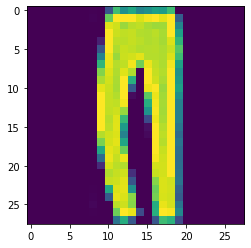

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[2])

In [39]:
from keras.utils import np_utils

trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [42]:
classifier = Sequential()
classifier.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))

classifier.add(Dense(units=10,activation='softmax'))

In [43]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [44]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [45]:
history = classifier.fit(trainX,trainY,
batch_size=128,
epochs=2,
verbose = 2,
validation_data=(testX,testY))

Epoch 1/2
469/469 - 42s - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3117 - val_accuracy: 0.0887 - 42s/epoch - 90ms/step
Epoch 2/2
469/469 - 40s - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3120 - val_accuracy: 0.0900 - 40s/epoch - 86ms/step


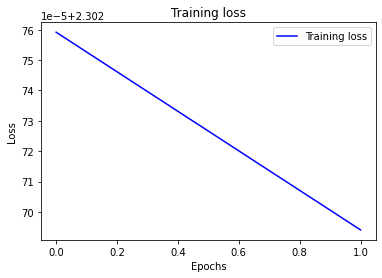

In [48]:
plt.plot(history.epoch,history.history["loss"],'b',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
